In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
df=pd.read_csv('Cleaned_reviewsData (1).csv')

In [3]:
df.columns

Index(['Unnamed: 0.1', 'Unnamed: 0', 'Customer_Name', 'Rating', 'Review_Title',
       'User_Review', 'model_name', 'Clean_reviews', 'sentiment'],
      dtype='object')

In [4]:
df=df[['Rating', 'Review_Title',
       'User_Review', 'model_name', 'sentiment']]

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 275 entries, 0 to 274
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Rating        275 non-null    int64 
 1   Review_Title  275 non-null    object
 2   User_Review   275 non-null    object
 3   model_name    275 non-null    object
 4   sentiment     275 non-null    int64 
dtypes: int64(2), object(3)
memory usage: 10.9+ KB


<AxesSubplot:>

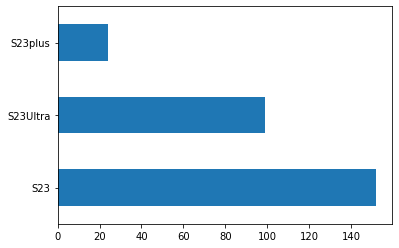

In [6]:
df.model_name.value_counts().plot(kind='barh')

In [7]:
!pip install wordcloud

In [8]:
from wordcloud import WordCloud

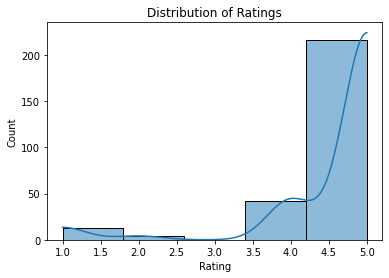

In [9]:
# Step 2: Distribution of Ratings
plt.figure(figsize=(6, 4))
sns.histplot(df['Rating'], bins=5, kde=True)
plt.title('Distribution of Ratings')
plt.xlabel('Rating')
plt.ylabel('Count')
plt.show()

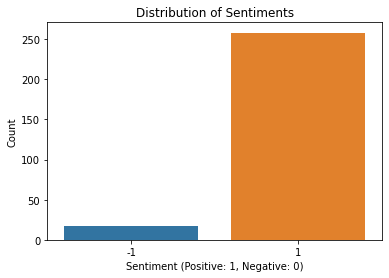

In [10]:
# Step 3: Distribution of Sentiments
plt.figure(figsize=(6, 4))
sns.countplot(df['sentiment'])
plt.title('Distribution of Sentiments')
plt.xlabel('Sentiment (Positive: 1, Negative: 0)')
plt.ylabel('Count')
plt.show()

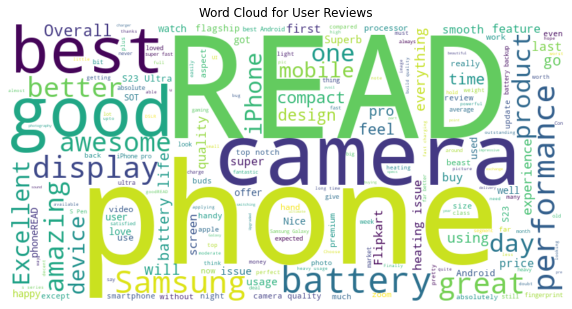

In [11]:
# Step 4: Word Cloud for User_Review
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(' '.join(df['User_Review']))
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud for User Reviews')
plt.show()

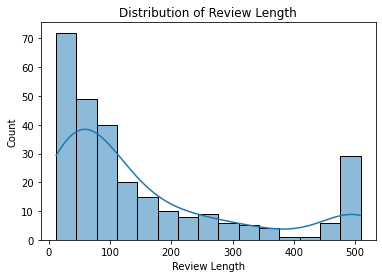

In [18]:
# Step 5: Review Length
df['User_Review'].apply(len)
plt.figure(figsize=(6, 4))
sns.histplot(df['User_Review'].apply(len), bins=15, kde=True)
plt.title('Distribution of Review Length')
plt.xlabel('Review Length')
plt.ylabel('Count')
plt.show()

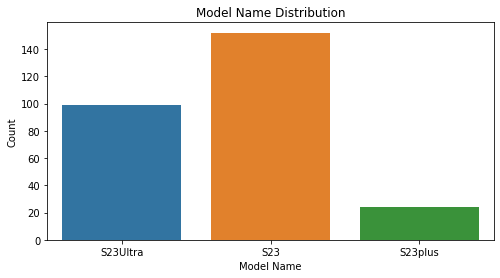

In [19]:
# Step 6: Model Name Distribution
plt.figure(figsize=(8, 4))
sns.countplot(df['model_name'])
plt.title('Model Name Distribution')
plt.xlabel('Model Name')
plt.ylabel('Count')
plt.show()

In [20]:
# Step 2: Word Frequency Analysis
word_freq = pd.Series(' '.join(df['User_Review']).lower().split()).value_counts()


In [21]:
word_freq

more          286
is            260
the           213
and           175
i             118
             ... 
cool            1
such            1
wow.read        1
aspectread      1
plusread        1
Length: 1830, dtype: int64

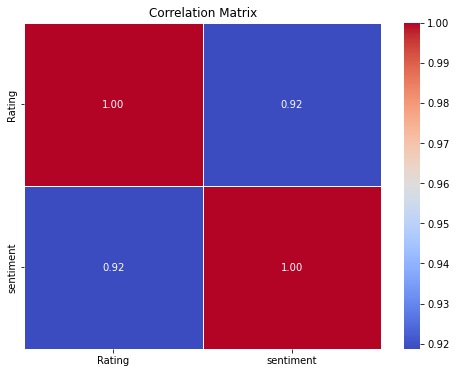

In [22]:
# Step 3: Correlation Analysis
correlation_matrix = df.corr()
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

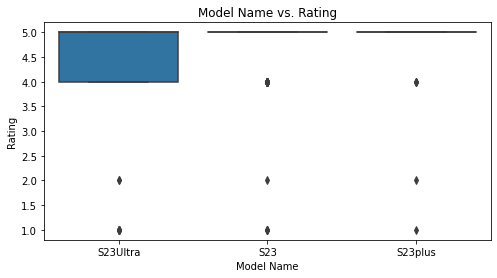

In [23]:
# Step 5: Model Comparison
plt.figure(figsize=(8, 4))
sns.boxplot(x='model_name', y='Rating', data=df)
plt.title('Model Name vs. Rating')
plt.xlabel('Model Name')
plt.ylabel('Rating')
plt.show()

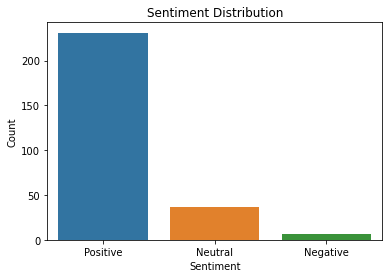

In [30]:
from textblob import TextBlob

# Sentiment Analysis using TextBlob
df['Sentiment_Polarity'] = df['User_Review'].apply(lambda x: TextBlob(x).sentiment.polarity)
df['Sentiment'] = df['Sentiment_Polarity'].apply(lambda x: 'Positive' if x > 0.3 else ('Negative' if x < 0 else 'Neutral'))

# Visualize Sentiment Distribution
plt.figure(figsize=(6, 4))
sns.countplot(df['Sentiment'])
plt.title('Sentiment Distribution')
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.show()

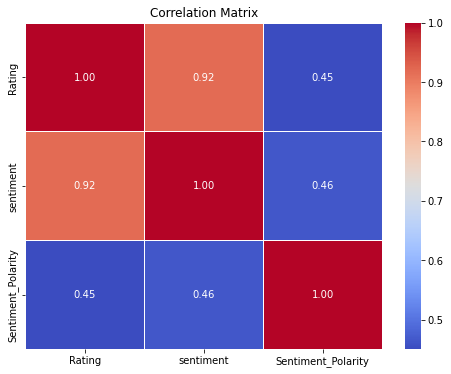

In [31]:
# Correlation Analysis
correlation_matrix = df.corr()
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

In [34]:
df.drop(['sentiment'],axis=1,inplace=True)

In [35]:
df

,Rating,Review_Title,User_Review,model_name,Sentiment_Polarity,Sentiment
0,5,Awesome,"Excellent product and awesome features , zoom ...",S23Ultra,0.612500,Positive
1,5,Worth every penny,"I ordered the product during pre-book period, ...",S23Ultra,0.574242,Positive
2,5,Brilliant,One of the best camera phone 🤳 📱#samsung galax...,S23Ultra,0.750000,Positive
3,5,Highly recommended,Fantastic mobile in all means. This is the bes...,S23Ultra,0.356809,Positive
4,5,Best in the market!,The best of the best. S23 Ultra is the best ph...,S23Ultra,0.757143,Positive
...,...,...,...,...,...,...
270,5,Highly recommended,Phone is very good but size and weight is big ...,S23plus,0.240312,Neutral
271,5,Perfect product!,Good flat display. Currenlt battery is also go...,S23plus,0.468750,Positive
272,5,Highly recommended,Exceptional Performance and Experience.Have Ba...,S23plus,0.333333,Positive
273,2,Bad quality,Not good product it's worst service from Flipk...,S23plus,-0.283333,Negative


In [36]:
from transformers import pipeline

# Load the pre-trained emotion analysis model
emotion_analyzer = pipeline("sentiment-analysis")

No model was supplied, defaulted to distilbert-base-uncased-finetuned-sst-2-english and revision af0f99b (https://huggingface.co/distilbert-base-uncased-finetuned-sst-2-english).
Using a pipeline without specifying a model name and revision in production is not recommended.


All PyTorch model weights were used when initializing TFDistilBertForSequenceClassification.

All the weights of TFDistilBertForSequenceClassification were initialized from the PyTorch model.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFDistilBertForSequenceClassification for predictions without further training.


In [44]:
# Sample text for emotion analysis
text = "lafoots are more in this area!"

# Perform emotion analysis on the text
result = emotion_analyzer(text)[0]['label']

# Output the emotion and score
print(result)


NEGATIVE


In [46]:
df['emotion_lable']=df.User_Review.apply(lambda x: emotion_analyzer(x)[0]['label'])
df['emotion_score']=df.User_Review.apply(lambda x:emotion_analyzer(x)[0]['score'])

In [47]:
df

,Rating,Review_Title,User_Review,model_name,Sentiment_Polarity,Sentiment,emotion_lable,emotion_score
0,5,Awesome,"Excellent product and awesome features , zoom ...",S23Ultra,0.612500,Positive,POSITIVE,0.997543
1,5,Worth every penny,"I ordered the product during pre-book period, ...",S23Ultra,0.574242,Positive,POSITIVE,0.999710
2,5,Brilliant,One of the best camera phone 🤳 📱#samsung galax...,S23Ultra,0.750000,Positive,POSITIVE,0.999499
3,5,Highly recommended,Fantastic mobile in all means. This is the bes...,S23Ultra,0.356809,Positive,POSITIVE,0.999588
4,5,Best in the market!,The best of the best. S23 Ultra is the best ph...,S23Ultra,0.757143,Positive,POSITIVE,0.999760
...,...,...,...,...,...,...,...,...
270,5,Highly recommended,Phone is very good but size and weight is big ...,S23plus,0.240312,Neutral,POSITIVE,0.999712
271,5,Perfect product!,Good flat display. Currenlt battery is also go...,S23plus,0.468750,Positive,POSITIVE,0.958293
272,5,Highly recommended,Exceptional Performance and Experience.Have Ba...,S23plus,0.333333,Positive,NEGATIVE,0.922420
273,2,Bad quality,Not good product it's worst service from Flipk...,S23plus,-0.283333,Negative,NEGATIVE,0.999814


<AxesSubplot:>

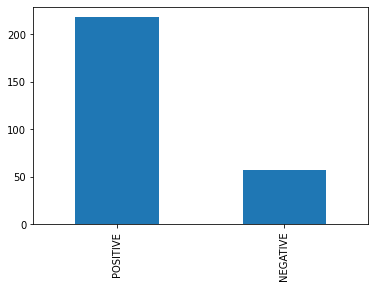

In [49]:
df.emotion_lable.value_counts().plot(kind='bar')

In [50]:
# Sample text for emotion analysis
text = "I am feeling really happy and excited about this new project!"

# Perform emotion analysis on the text
result = emotion_analyzer(text)

# Output the emotion and score
print(result)

[{'label': 'POSITIVE', 'score': 0.9998719692230225}]


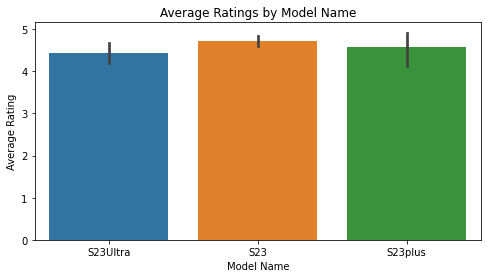

In [51]:
# Review Titles Analysis
review_title_freq = pd.Series(' '.join(df['Review_Title']).lower().split()).value_counts()
# Visualize the most common words or phrases in review titles

# Model Name vs. Ratings
plt.figure(figsize=(8, 4))
sns.barplot(x='model_name', y='Rating', data=df)
plt.title('Average Ratings by Model Name')
plt.xlabel('Model Name')
plt.ylabel('Average Rating')
plt.show()

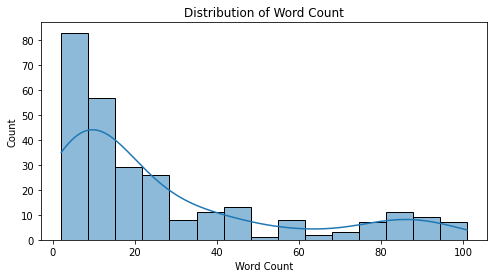

In [52]:
# Word Count Analysis
df['Word_Count'] = df['User_Review'].apply(lambda x: len(x.split()))
plt.figure(figsize=(8, 4))
sns.histplot(df['Word_Count'], bins=15, kde=True)
plt.title('Distribution of Word Count')
plt.xlabel('Word Count')
plt.ylabel('Count')
plt.show()

In [53]:
# Word Frequency by Sentiment
positive_reviews = ' '.join(df[df['Sentiment'] == 'Positive']['User_Review'])
negative_reviews = ' '.join(df[df['Sentiment'] == 'Negative']['User_Review'])
# Perform word frequency analysis for positive_reviews and negative_reviews separately


In [54]:
positive_reviews

"Excellent product and awesome features , zoom is beyond comparisonExcellent display and good battery life. S pen is a master in it's own league.While sticking screen guards Kindly make sure glue doesn't leak to the speaker or S pen  modules as it may create an issue Inorder to avail the offerPlease go toAccountCouponsAll rewards and scroll downYou will get the offer mentioned and you can order the same if you are eligibleHappy purchasingREAD MORE I ordered the product during pre-book period, exchanging my old OP6.The product is great, the seller delivered in time. The exchange process with Flipkart was also great. After the return period I got my Galaxy buds 2 and Watch 4 classic as well.The camera quality is excellent, the battery life is great as well. I am getting around 10 hours SOT, and 24 hours total time in a full recharge.OneUI is one of the best Android experience you can get.Overall a great deal.READ MORE One of the best camera phone 🤳 📱#samsung galaxy s23 ultra 💯 🤞READ MORE

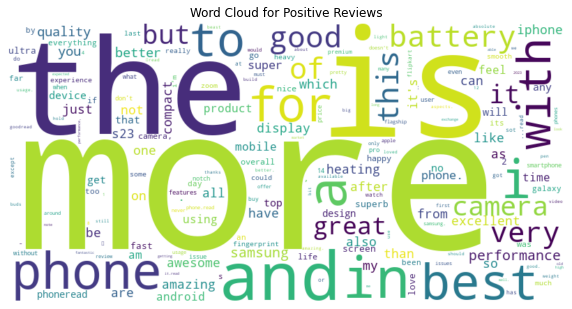

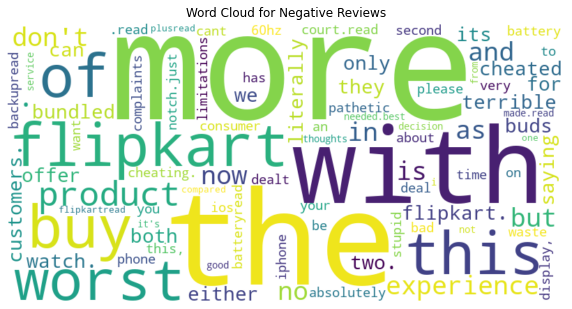

In [56]:
from collections import Counter
# Word frequency analysis for positive_reviews
positive_word_freq = Counter(positive_reviews.lower().split())
# Visualize the most common words
plt.figure(figsize=(10, 6))
wordcloud_positive = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(positive_word_freq)
plt.imshow(wordcloud_positive, interpolation='bilinear')
plt.title('Word Cloud for Positive Reviews')
plt.axis('off')
plt.show()

# Word frequency analysis for negative_reviews
negative_word_freq = Counter(negative_reviews.lower().split())
# Visualize the most common words
plt.figure(figsize=(10, 6))
wordcloud_negative = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(negative_word_freq)
plt.imshow(wordcloud_negative, interpolation='bilinear')
plt.title('Word Cloud for Negative Reviews')
plt.axis('off')
plt.show()






In [57]:
df

,Rating,Review_Title,User_Review,model_name,Sentiment_Polarity,Sentiment,emotion_lable,emotion_score,Word_Count
0,5,Awesome,"Excellent product and awesome features , zoom ...",S23Ultra,0.612500,Positive,POSITIVE,0.997543,74
1,5,Worth every penny,"I ordered the product during pre-book period, ...",S23Ultra,0.574242,Positive,POSITIVE,0.999710,84
2,5,Brilliant,One of the best camera phone 🤳 📱#samsung galax...,S23Ultra,0.750000,Positive,POSITIVE,0.999499,14
3,5,Highly recommended,Fantastic mobile in all means. This is the bes...,S23Ultra,0.356809,Positive,POSITIVE,0.999588,87
4,5,Best in the market!,The best of the best. S23 Ultra is the best ph...,S23Ultra,0.757143,Positive,POSITIVE,0.999760,17
...,...,...,...,...,...,...,...,...,...
270,5,Highly recommended,Phone is very good but size and weight is big ...,S23plus,0.240312,Neutral,POSITIVE,0.999712,24
271,5,Perfect product!,Good flat display. Currenlt battery is also go...,S23plus,0.468750,Positive,POSITIVE,0.958293,15
272,5,Highly recommended,Exceptional Performance and Experience.Have Ba...,S23plus,0.333333,Positive,NEGATIVE,0.922420,16
273,2,Bad quality,Not good product it's worst service from Flipk...,S23plus,-0.283333,Negative,NEGATIVE,0.999814,9


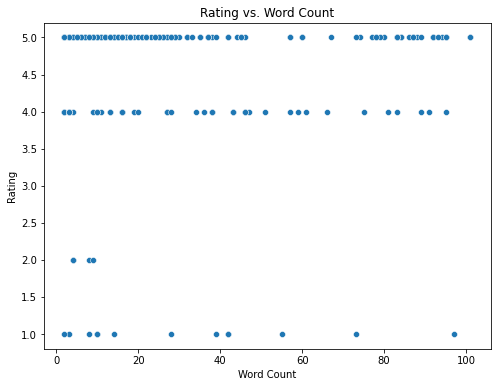

In [58]:
# Rating vs. Word Count
plt.figure(figsize=(8, 6))
sns.scatterplot(x='Word_Count', y='Rating', data=df)
plt.title('Rating vs. Word Count')
plt.xlabel('Word Count')
plt.ylabel('Rating')
plt.show()

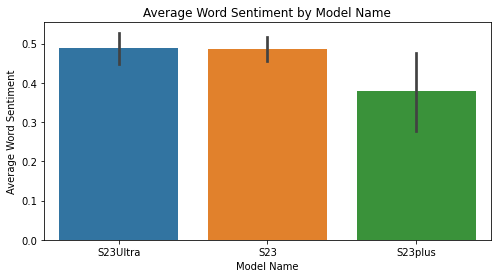

In [62]:
plt.figure(figsize=(8, 4))
sns.barplot(x='model_name', y='Sentiment_Polarity', data=df)
plt.title('Average Word Sentiment by Model Name')
plt.xlabel('Model Name')
plt.ylabel('Average Word Sentiment')
plt.show()

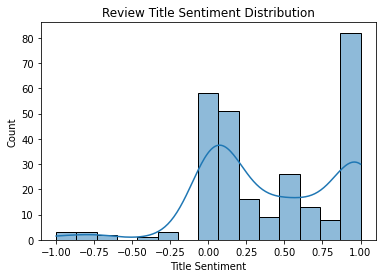

In [63]:
# Review Title Sentiment (using TextBlob)
df['Title_Sentiment'] = df['Review_Title'].apply(lambda x: TextBlob(x).sentiment.polarity)
plt.figure(figsize=(6, 4))
sns.histplot(df['Title_Sentiment'], bins=15, kde=True)
plt.title('Review Title Sentiment Distribution')
plt.xlabel('Title Sentiment')
plt.ylabel('Count')
plt.show()

In [65]:

import spacy
import gensim
from gensim.models import LdaModel
from gensim.corpora import Dictionary
import pyLDAvis.gensim_models as gensimvis

In [69]:
# Load spaCy model for text preprocessing
nlp = spacy.load("en_core_web_sm")

In [70]:

# Preprocess text data
def preprocess_text(text):
    doc = nlp(text)
    return [token.lemma_ for token in doc if not token.is_stop and token.is_alpha]


In [76]:
dictionary

In [78]:
# Load the regular expression library
import re
# Remove punctuation
df['User_Review'] = \
df['User_Review'].map(lambda x: re.sub('[,\.!?]', '', x))
# Convert the titles to lowercase
df['User_Review'] = \
df['User_Review'].map(lambda x: x.lower())
# Print out the first rows of papers
df['User_Review'].head()

<>:5: DeprecationWarning: invalid escape sequence \.
<>:5: DeprecationWarning: invalid escape sequence \.
C:\Users\DELL\AppData\Local\Temp\ipykernel_26172\2375734623.py:5: DeprecationWarning: invalid escape sequence \.
  df['User_Review'].map(lambda x: re.sub('[,\.!?]', '', x))


0    excellent product and awesome features  zoom i...
1    i ordered the product during pre-book period e...
2    one of the best camera phone 🤳 📱#samsung galax...
3    fantastic mobile in all means this is the best...
4    the best of the best s23 ultra is the best pho...
Name: User_Review, dtype: object

In [80]:
import gensim
from gensim.utils import simple_preprocess
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
stop_words = stopwords.words('english')
stop_words.extend(['from', 'subject', 're', 'edu', 'use'])
def sent_to_words(sentences):
    for sentence in sentences:
        # deacc=True removes punctuations
        yield(gensim.utils.simple_preprocess(str(sentence), deacc=True))
def remove_stopwords(texts):
    return [[word for word in simple_preprocess(str(doc)) 
             if word not in stop_words] for doc in texts]
data = df.User_Review.values.tolist()
data_words = list(sent_to_words(data))
# remove stop words
data_words = remove_stopwords(data_words)
print(data_words[:1][0][:30])

['excellent', 'product', 'awesome', 'features', 'zoom', 'beyond', 'display', 'good', 'battery', 'life', 'pen', 'master', 'leaguewhile', 'sticking', 'screen', 'guards', 'kindly', 'make', 'sure', 'glue', 'leak', 'speaker', 'pen', 'modules', 'may', 'create', 'issue', 'inorder', 'avail', 'offerplease']


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\DELL\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [88]:
import gensim.corpora as corpora
# Create Dictionary
id2word = corpora.Dictionary(data_words)
# Create Corpus
texts = data_words
# Term Document Frequency
corpus = [id2word.doc2bow(text) for text in texts]
# View
print(corpus[:1][0][:30])

[(0, 1), (1, 1), (2, 1), (3, 1), (4, 1), (5, 1), (6, 1), (7, 1), (8, 1), (9, 1), (10, 1), (11, 1), (12, 1), (13, 1), (14, 1), (15, 1), (16, 1), (17, 1), (18, 1), (19, 1), (20, 1), (21, 1), (22, 1), (23, 1), (24, 1), (25, 1), (26, 1), (27, 1), (28, 1), (29, 2)]


In [93]:
id2word

In [89]:
from pprint import pprint
# number of topics
num_topics = 10
# Build LDA model
lda_model = gensim.models.LdaMulticore(corpus=corpus,
                                       id2word=id2word,
                                       num_topics=num_topics)
# Print the Keyword in the 10 topics
pprint(lda_model.print_topics())
doc_lda = lda_model[corpus]

[(0,
  '0.032*"good" + 0.028*"phone" + 0.022*"battery" + 0.020*"excellent" + '
  '0.020*"camera" + 0.018*"performance" + 0.016*"best" + 0.012*"amazing" + '
  '0.009*"compact" + 0.008*"itread"'),
 (1,
  '0.032*"phone" + 0.030*"best" + 0.015*"samsung" + 0.014*"phoneread" + '
  '0.011*"one" + 0.011*"niceread" + 0.009*"battery" + 0.009*"first" + '
  '0.008*"life" + 0.008*"camera"'),
 (2,
  '0.028*"battery" + 0.019*"good" + 0.018*"camera" + 0.016*"best" + '
  '0.015*"phone" + 0.014*"better" + 0.014*"performance" + 0.012*"iphone" + '
  '0.010*"awesome" + 0.009*"samsung"'),
 (3,
  '0.020*"read" + 0.016*"display" + 0.012*"good" + 0.011*"performance" + '
  '0.010*"battery" + 0.010*"samsung" + 0.009*"notch" + 0.008*"hz" + '
  '0.008*"hrs" + 0.008*"great"'),
 (4,
  '0.030*"phone" + 0.020*"great" + 0.018*"camera" + 0.016*"quality" + '
  '0.015*"best" + 0.012*"battery" + 0.011*"read" + 0.011*"display" + '
  '0.011*"good" + 0.011*"one"'),
 (5,
  '0.026*"good" + 0.024*"battery" + 0.017*"phone" + 0.01

Topic 1: great good battery product read fast camera samsung watch best


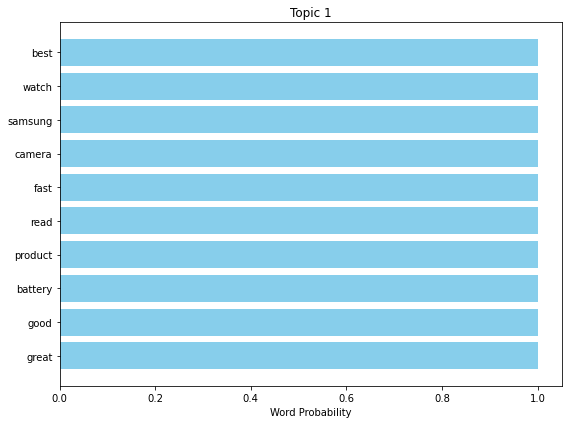

Topic 2: phone camera good battery best iphone better display performance awesome


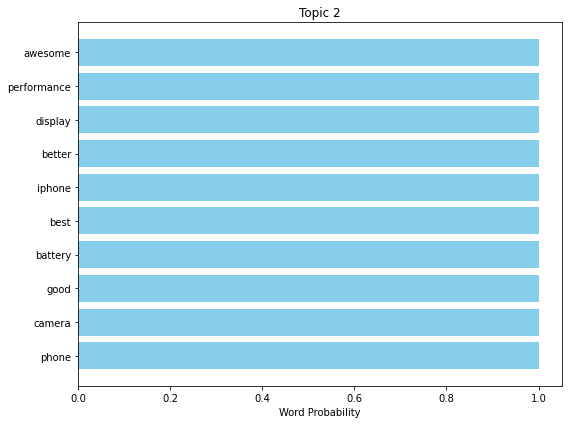

Topic 3: phone samsung best battery performance camera amazing s23 life mobile


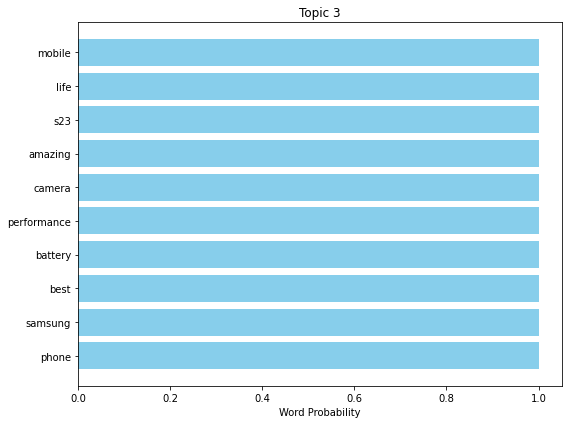

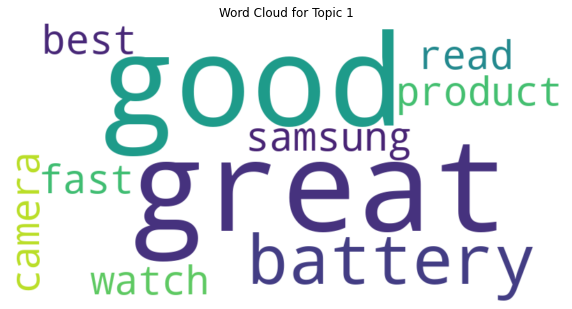

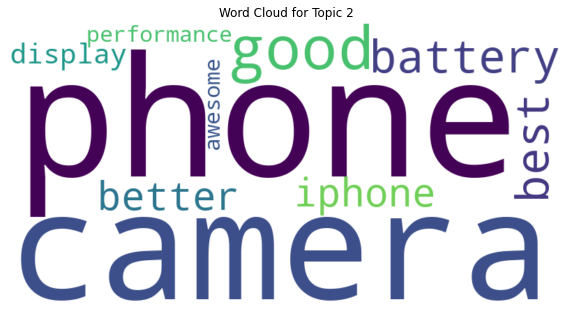

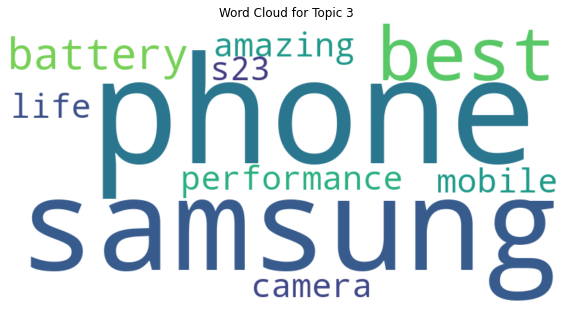

In [95]:
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation
import matplotlib.pyplot as plt
from wordcloud import WordCloud

# Assuming you have loaded the dataset into a DataFrame called "df"
# Convert the text data (User_Review) into a list
user_reviews = df['User_Review'].tolist()

# Create a CountVectorizer to convert the text data into a document-term matrix
vectorizer = CountVectorizer(max_features=1000, stop_words='english')
dtm = vectorizer.fit_transform(user_reviews)

# Train the LDA model
num_topics = 3  # You can set the number of topics according to your preference
lda_model = LatentDirichletAllocation(n_components=num_topics, random_state=42)
lda_model.fit(dtm)

# Get the top words for each topic
def get_top_words(model, feature_names, n_top_words):
    top_words = []
    for topic_idx, topic in enumerate(model.components_):
        top_words.append([feature_names[i] for i in topic.argsort()[:-n_top_words - 1:-1]])
    return top_words

n_top_words = 10  # Set the number of top words to display for each topic
feature_names = vectorizer.get_feature_names()
top_words = get_top_words(lda_model, feature_names, n_top_words)

# Print and plot the top words for each topic
for i, words in enumerate(top_words):
    print(f"Topic {i + 1}: {' '.join(words)}")

    # Plot the top words as a bar plot
    plt.figure(figsize=(8, 6))
    plt.barh(range(n_top_words), [1] * n_top_words, color='white')
    plt.barh(range(n_top_words), [1] * n_top_words, color='skyblue')
    plt.yticks(range(n_top_words), words)
    plt.title(f"Topic {i + 1}")
    plt.xlabel("Word Probability")
    plt.tight_layout()
    plt.show()

# Create word clouds for each topic
for i, words in enumerate(top_words):
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(' '.join(words))
    plt.figure(figsize=(10, 6))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.title(f"Word Cloud for Topic {i + 1}")
    plt.axis("off")
    plt.show()


In [99]:
df

,Rating,Review_Title,User_Review,model_name,Sentiment_Polarity,Sentiment,emotion_lable,emotion_score,Word_Count,Title_Sentiment,Processed_User_Review
0,5,Awesome,excellent product and awesome features zoom i...,S23Ultra,0.612500,Positive,POSITIVE,0.997543,74,1.00,excellent product and awesome features zoom i...
1,5,Worth every penny,i ordered the product during pre-book period e...,S23Ultra,0.574242,Positive,POSITIVE,0.999710,84,0.30,i ordered the product during pre-book period e...
2,5,Brilliant,one of the best camera phone 🤳 📱#samsung galax...,S23Ultra,0.750000,Positive,POSITIVE,0.999499,14,0.90,one of the best camera phone 🤳 📱#samsung galax...
3,5,Highly recommended,fantastic mobile in all means this is the best...,S23Ultra,0.356809,Positive,POSITIVE,0.999588,87,0.16,fantastic mobile in all means this is the best...
4,5,Best in the market!,the best of the best s23 ultra is the best pho...,S23Ultra,0.757143,Positive,POSITIVE,0.999760,17,1.00,the best of the best s23 ultra is the best pho...
...,...,...,...,...,...,...,...,...,...,...,...
270,5,Highly recommended,phone is very good but size and weight is big ...,S23plus,0.240312,Neutral,POSITIVE,0.999712,24,0.16,phone is very good but size and weight is big ...
271,5,Perfect product!,good flat display currenlt battery is also goo...,S23plus,0.468750,Positive,POSITIVE,0.958293,15,1.00,good flat display currenlt battery is also goo...
272,5,Highly recommended,exceptional performance and experiencehave bat...,S23plus,0.333333,Positive,NEGATIVE,0.922420,16,0.16,exceptional performance and experiencehave bat...
273,2,Bad quality,not good product it's worst service from flipk...,S23plus,-0.283333,Negative,NEGATIVE,0.999814,9,-0.70,not good product it's worst service from flipk...


In [98]:
# Load the regular expression library
import re
# Remove punctuation
df['Processed_User_Review'] = \
df['User_Review'].map(lambda x: re.sub('[,\.!?]', '', x))
# Convert the titles to lowercase
df['Processed_User_Review'] = \
df['Processed_User_Review'].map(lambda x: x.lower())
# Print out the first rows of papers
df['Processed_User_Review'].head()

<>:5: DeprecationWarning: invalid escape sequence \.
<>:5: DeprecationWarning: invalid escape sequence \.
C:\Users\DELL\AppData\Local\Temp\ipykernel_26172\926410241.py:5: DeprecationWarning: invalid escape sequence \.
  df['User_Review'].map(lambda x: re.sub('[,\.!?]', '', x))


0    excellent product and awesome features  zoom i...
1    i ordered the product during pre-book period e...
2    one of the best camera phone 🤳 📱#samsung galax...
3    fantastic mobile in all means this is the best...
4    the best of the best s23 ultra is the best pho...
Name: Processed_User_Review, dtype: object

In [141]:
import gensim
from gensim.utils import simple_preprocess
from gensim.models.coherencemodel import CoherenceModel
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
stop_words = stopwords.words('english')
stop_words.extend(['from', 'subject', 're', 'edu', 'use'])
def sent_to_words(sentences):
    for sentence in sentences:
        # deacc=True removes punctuations
        yield(gensim.utils.simple_preprocess(str(sentence), deacc=True))
def remove_stopwords(texts):
    return [[word for word in simple_preprocess(str(doc)) 
             if word not in stop_words] for doc in texts]
data = df.Processed_User_Review.values.tolist()
data_words = list(sent_to_words(data))
# remove stop words
data_words = remove_stopwords(data_words)
print(data_words[:1][0][:30])

['excellent', 'product', 'awesome', 'features', 'zoom', 'beyond', 'display', 'good', 'battery', 'life', 'pen', 'master', 'leaguewhile', 'sticking', 'screen', 'guards', 'kindly', 'make', 'sure', 'glue', 'leak', 'speaker', 'pen', 'modules', 'may', 'create', 'issue', 'inorder', 'avail', 'offerplease']


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\DELL\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [101]:
import gensim.corpora as corpora
# Create Dictionary
id2word = corpora.Dictionary(data_words)
# Create Corpus
texts = data_words
# Term Document Frequency
corpus = [id2word.doc2bow(text) for text in texts]
# View
print(corpus[:1][0][:30])

[(0, 1), (1, 1), (2, 1), (3, 1), (4, 1), (5, 1), (6, 1), (7, 1), (8, 1), (9, 1), (10, 1), (11, 1), (12, 1), (13, 1), (14, 1), (15, 1), (16, 1), (17, 1), (18, 1), (19, 1), (20, 1), (21, 1), (22, 1), (23, 1), (24, 1), (25, 1), (26, 1), (27, 1), (28, 1), (29, 2)]


In [102]:
from pprint import pprint
# number of topics
num_topics = 10
# Build LDA model
lda_model = gensim.models.LdaMulticore(corpus=corpus,
                                       id2word=id2word,
                                       num_topics=num_topics)
# Print the Keyword in the 10 topics
pprint(lda_model.print_topics())
doc_lda = lda_model[corpus]

[(0,
  '0.034*"battery" + 0.024*"phone" + 0.018*"samsung" + 0.015*"read" + '
  '0.012*"camera" + 0.012*"good" + 0.012*"display" + 0.012*"awesome" + '
  '0.011*"like" + 0.011*"phoneread"'),
 (1,
  '0.032*"phone" + 0.020*"camera" + 0.018*"best" + 0.018*"battery" + '
  '0.014*"samsung" + 0.014*"good" + 0.011*"great" + 0.008*"one" + '
  '0.008*"performance" + 0.008*"display"'),
 (2,
  '0.022*"phone" + 0.017*"amazing" + 0.016*"battery" + 0.014*"device" + '
  '0.010*"first" + 0.009*"time" + 0.008*"display" + 0.008*"camera" + '
  '0.007*"iphone" + 0.007*"best"'),
 (3,
  '0.027*"great" + 0.018*"phone" + 0.015*"pro" + 0.014*"battery" + '
  '0.013*"iphone" + 0.012*"samsung" + 0.011*"product" + 0.010*"performance" + '
  '0.010*"get" + 0.010*"awesome"'),
 (4,
  '0.023*"good" + 0.017*"battery" + 0.013*"phone" + 0.013*"excellent" + '
  '0.012*"better" + 0.010*"mobile" + 0.009*"one" + 0.009*"best" + 0.009*"mode" '
  '+ 0.009*"portrait"'),
 (5,
  '0.019*"fast" + 0.018*"read" + 0.014*"screen" + 0.014*"

In [139]:
# Build LDA model
lda_model = LdaModel(corpus=corpus,
                   id2word=id2word,
                   num_topics=10,
                   random_state=0,
                   chunksize=100,
                   alpha='auto',
                   per_word_topics=True)

pprint(lda_model.print_topics())
doc_lda = lda_model[corpus]

[(0,
  '0.050*"good" + 0.031*"battery" + 0.025*"hrs" + 0.021*"samsung" + '
  '0.019*"review" + 0.018*"camera" + 0.016*"amazing" + 0.016*"pretty" + '
  '0.014*"smartphone" + 0.012*"processor"'),
 (1,
  '0.035*"day" + 0.024*"last" + 0.023*"phone" + 0.020*"heavy" + 0.017*"bit" + '
  '0.015*"compact" + 0.014*"battery" + 0.014*"easily" + 0.013*"gaming" + '
  '0.013*"issues"'),
 (2,
  '0.034*"mobile" + 0.029*"performance" + 0.026*"like" + 0.025*"read" + '
  '0.022*"without" + 0.021*"best" + 0.017*"never" + 0.016*"camera" + '
  '0.016*"battery" + 0.015*"mind"'),
 (3,
  '0.046*"phone" + 0.041*"battery" + 0.041*"camera" + 0.035*"good" + '
  '0.029*"best" + 0.019*"display" + 0.019*"great" + 0.018*"performance" + '
  '0.018*"also" + 0.017*"awesome"'),
 (4,
  '0.053*"notch" + 0.034*"top" + 0.027*"little" + 0.025*"years" + '
  '0.018*"charger" + 0.016*"great" + 0.014*"working" + 0.014*"within" + '
  '0.014*"fast" + 0.012*"performance"'),
 (5,
  '0.073*"excellent" + 0.049*"itread" + 0.024*"features"

In [154]:
# Compute Coherence Score
tweets=df.Processed_User_Review.values.tolist()
coherence_model_lda = CoherenceModel(model=lda_model, texts=tweets, dictionary=id2word, coherence='c_v')



In [177]:
!pip install --upgrade nltk

In [178]:
!pip show nltk

Name: nltk
Version: 3.8.1
Summary: Natural Language Toolkit
Home-page: https://www.nltk.org/
Author: NLTK Team
Author-email: nltk.team@gmail.com
License: Apache License, Version 2.0
Location: c:\users\dell\anaconda3\lib\site-packages
Requires: click, joblib, regex, tqdm
Required-by: textblob


In [181]:
# Download stopwords and lemmatizer data
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize
import nltk

import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from gensim import corpora, models
import pyLDAvis.gensim_models as gensimvis
import pyLDAvis
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)
import nltk
nltk.download('omw')


nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')


# Preprocessing function
def preprocess_text(text):
    stop_words = set(stopwords.words('english'))
    lemmatizer = WordNetLemmatizer()
    tokens = word_tokenize(text.lower())
    tokens = [token for token in tokens if token.isalpha()]
    tokens = [lemmatizer.lemmatize(token) for token in tokens if token not in stop_words]
    return tokens

import nltk

# Set the NLTK data path to a directory where you have write permissions
nltk.data.path.append('/path/to/your/nltk_data_directory')


[nltk_data] Downloading package omw to
[nltk_data]     C:\Users\DELL\AppData\Roaming\nltk_data...
[nltk_data]   Package omw is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\DELL\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\DELL\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\DELL\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [183]:
import pandas as pd
import spacy
nlp = spacy.load("en_core_web_sm")



In [184]:
def preprocess_text(text):
    doc = nlp(text.lower())
    tokens = [token.lemma_ for token in doc if token.is_alpha and not token.is_stop]
    return tokens


In [185]:
processed_user_reviews = df.User_Review.apply(lambda x: preprocess_text(x))



In [186]:
processed_user_reviews

0      [excellent, product, awesome, feature, zoom, c...
1      [order, product, pre, book, period, exchange, ...
2      [good, camera, phone, samsung, galaxy, ultra, ...
3      [fantastic, mobile, mean, good, android, marke...
4      [good, good, ultra, good, phone, world, right,...
                             ...                        
270    [phone, good, size, weight, big, little, bit, ...
271    [good, flat, display, currenlt, battery, good,...
272    [exceptional, performance, experiencehave, bat...
273          [good, product, bad, service, flipkartread]
274                    [bad, product, compare, plusread]
Name: User_Review, Length: 275, dtype: object

In [187]:
# Create a dictionary representation of the documents
dictionary = corpora.Dictionary(processed_user_reviews)

# Create the document-term matrix
doc_term_matrix = [dictionary.doc2bow(doc) for doc in processed_user_reviews]


In [188]:
# Set the number of topics for LDA
num_topics = 8

# Train the LDA model
lda_model = models.LdaModel(doc_term_matrix, num_topics=num_topics, id2word=dictionary, passes=10)


In [190]:
# Convert to list
data = df.Processed_User_Review.values.tolist()
data_words = list(sent_to_words(data))
print(data_words[:1])


[['excellent', 'product', 'and', 'awesome', 'features', 'zoom', 'is', 'beyond', 'display', 'and', 'good', 'battery', 'life', 'pen', 'is', 'master', 'in', 'it', 'own', 'leaguewhile', 'sticking', 'screen', 'guards', 'kindly', 'make', 'sure', 'glue', 'doesn', 'leak', 'to', 'the', 'speaker', 'or', 'pen', 'modules', 'as', 'it', 'may', 'create', 'an', 'issue', 'inorder', 'to', 'avail', 'the', 'offerplease', 'go', 'rewards', 'and', 'scroll', 'downyou', 'will', 'get', 'the', 'offer', 'mentioned', 'and', 'you', 'can', 'order', 'the', 'same', 'if', 'you', 'are', 'eligiblehappy', 'purchasingread', 'more']]


In [191]:
# Build the bigram and trigram models
bigram = gensim.models.Phrases(data_words, min_count=5, threshold=100) # higher threshold fewer phrases.
trigram = gensim.models.Phrases(bigram[data_words], threshold=100)  
bigram_mod = gensim.models.phrases.Phraser(bigram)
trigram_mod = gensim.models.phrases.Phraser(trigram)

In [199]:
# !python3 -m spacy download en  # run in terminal once
def process_words(texts, stop_words=stop_words, allowed_postags=['NOUN', 'ADJ', 'VERB', 'ADV']):
    """Remove Stopwords, Form Bigrams, Trigrams and Lemmatization"""
    texts = [[word for word in simple_preprocess(str(doc)) if word not in stop_words] for doc in texts]
    texts = [bigram_mod[doc] for doc in texts]
    texts = [trigram_mod[bigram_mod[doc]] for doc in texts]
    texts_out = []
    nlp = spacy.load('en_core_web_sm', disable=['parser', 'ner'])
    for sent in texts:
        doc = nlp(" ".join(sent)) 
        texts_out.append([token.lemma_ for token in doc if token.pos_ in allowed_postags])
    # remove stopwords once more after lemmatization
    texts_out = [[word for word in simple_preprocess(str(doc)) if word not in stop_words] for doc in texts_out]    
    return texts_out

In [200]:

import spacy
spacy.load("en_core_web_sm")

In [201]:
data_ready = process_words(data_words)

In [211]:
id2word = corpora.Dictionary(data_ready)

# Create Corpus: Term Document Frequency
corpus = [id2word.doc2bow(text) for text in data_ready]

# Build LDA model
lda_model = gensim.models.ldamodel.LdaModel(corpus=corpus,
                                           id2word=id2word,
                                           num_topics=6, 
                                           random_state=100,
                                           update_every=1,
                                           chunksize=10,
                                           passes=10,
                                           alpha='symmetric',
                                           iterations=100,
                                           per_word_topics=True)

pprint(lda_model.print_topics())

[(0,
  '0.115*"phone" + 0.063*"read" + 0.037*"good" + 0.027*"design" + 0.024*"fast" '
  '+ 0.019*"fingerprint" + 0.018*"well" + 0.015*"apply" + 0.014*"want" + '
  '0.013*"able"'),
 (1,
  '0.062*"day" + 0.038*"performance" + 0.033*"backup" + 0.029*"love" + '
  '0.027*"less" + 0.027*"last" + 0.026*"mobile" + 0.026*"android" + '
  '0.020*"compact" + 0.017*"nice"'),
 (2,
  '0.119*"good" + 0.059*"camera" + 0.028*"quality" + 0.028*"iphone" + '
  '0.028*"performance" + 0.025*"overall" + 0.022*"super" + 0.022*"feature" + '
  '0.020*"premium" + 0.018*"well"'),
 (3,
  '0.053*"amazing" + 0.047*"heavy" + 0.035*"bit" + 0.030*"happy" + 0.030*"pro" '
  '+ 0.025*"buy" + 0.022*"long" + 0.021*"usage" + 0.018*"video" + '
  '0.018*"give"'),
 (4,
  '0.103*"battery" + 0.042*"excellent" + 0.042*"display" + 0.035*"issue" + '
  '0.032*"also" + 0.027*"great" + 0.026*"awesome" + 0.020*"screen" + '
  '0.019*"get" + 0.015*"sot"'),
 (5,
  '0.051*"phone" + 0.047*"good" + 0.044*"product" + 0.036*"device" + '
  '0.032

In [212]:
def format_topics_sentences(ldamodel=None, corpus=corpus, texts=data):
    # Init output
    sent_topics_df = pd.DataFrame()

    # Get main topic in each document
    for i, row_list in enumerate(ldamodel[corpus]):
        row = row_list[0] if ldamodel.per_word_topics else row_list            
        # print(row)
        row = sorted(row, key=lambda x: (x[1]), reverse=True)
        # Get the Dominant topic, Perc Contribution and Keywords for each document
        for j, (topic_num, prop_topic) in enumerate(row):
            if j == 0:  # => dominant topic
                wp = ldamodel.show_topic(topic_num)
                topic_keywords = ", ".join([word for word, prop in wp])
                sent_topics_df = sent_topics_df.append(pd.Series([int(topic_num), round(prop_topic,4), topic_keywords]), ignore_index=True)
            else:
                break
    sent_topics_df.columns = ['Dominant_Topic', 'Perc_Contribution', 'Topic_Keywords']

    # Add original text to the end of the output
    contents = pd.Series(texts)
    sent_topics_df = pd.concat([sent_topics_df, contents], axis=1)
    return(sent_topics_df)


df_topic_sents_keywords = format_topics_sentences(ldamodel=lda_model, corpus=corpus, texts=data_ready)

# Format
df_dominant_topic = df_topic_sents_keywords.reset_index()
df_dominant_topic.columns = ['Document_No', 'Dominant_Topic', 'Topic_Perc_Contrib', 'Keywords', 'Text']
df_dominant_topic.head(10)

,Document_No,Dominant_Topic,Topic_Perc_Contrib,Keywords,Text
0,0,4,0.8086,"battery, excellent, display, issue, also, great, awesome, screen, get, sot","[excellent, product, awesome, feature, zoom, display, good, battery, life, pen, master, leaguewh..."
1,1,4,0.6613,"battery, excellent, display, issue, also, great, awesome, screen, get, sot","[order, product, book, period, exchange, old, op, product, great, seller, deliver, time, exchang..."
2,2,0,0.7171,"phone, read, good, design, fast, fingerprint, well, apply, want, able","[good, camera, phone, galaxy, ultra, read]"
3,3,2,0.6890,"good, camera, quality, iphone, performance, overall, super, feature, premium, well","[fantastic, mobile, mean, good, android, market, doubt, feel, far, well, late, iphone, term, qua..."
4,4,0,0.9067,"phone, read, good, design, fast, fingerprint, well, apply, want, able","[well, good, ultra, good, phone, world, right, nowread]"
5,5,5,0.9068,"phone, good, product, device, bad, phoneread, size, well, compare, big","[product, fantastic, guide, buyer, claim, watch, bud, offerread]"
6,6,0,0.6134,"phone, read, good, design, fast, fingerprint, well, apply, want, able","[wonderful, look, wise, specially, feel, mercede, car, feel, touch, never, explain, feel, hope, ..."
7,7,5,0.9126,"phone, good, product, device, bad, phoneread, size, well, compare, big","[product, really, good, flipkart, service, able, get, offer, offer, phone, kindly, guide, custom..."
8,8,5,0.4767,"phone, good, product, device, bad, phoneread, size, well, compare, big","[phone, awsome, camera, quality, superb, pen, addiction, ultra, user, display, quality, bestbatt..."
9,9,5,0.4767,"phone, good, product, device, bad, phoneread, size, well, compare, big","[phone, awsome, camera, quality, superb, pen, addiction, ultra, user, display, quality, bestbatt..."


In [213]:
pd.options.display.max_colwidth = 100

sent_topics_sorteddf_mallet = pd.DataFrame()
sent_topics_outdf_grpd = df_topic_sents_keywords.groupby('Dominant_Topic')

for i, grp in sent_topics_outdf_grpd:
    sent_topics_sorteddf_mallet = pd.concat([sent_topics_sorteddf_mallet, 
                                             grp.sort_values(['Perc_Contribution'], ascending=False).head(1)], 
                                            axis=0)

# Reset Index    
sent_topics_sorteddf_mallet.reset_index(drop=True, inplace=True)

# Format
sent_topics_sorteddf_mallet.columns = ['Topic_Num', "Topic_Perc_Contrib", "Keywords", "Representative Text"]

# Show
sent_topics_sorteddf_mallet.head(10)

,Topic_Num,Topic_Perc_Contrib,Keywords,Representative Text
0,0,0.9086,"phone, read, good, design, fast, fingerprint, well, apply, want, able","[month, find, facial, recognition, fingerprint, scanner, goodbee, ultra, top, model, flawlesslyn..."
1,1,0.7708,"day, performance, backup, love, less, last, mobile, android, compact, nice","[portrait, mode, excellentnight, mode, performance, goodpicture, clear, sharpcharging, speed, be..."
2,2,0.8570,"good, camera, quality, iphone, performance, overall, super, feature, premium, well","[camera, decent, optical, zoom, good, feature, choose, esim, physical, sim, secondary, numberread]"
3,3,0.8333,"amazing, heavy, bit, happy, pro, buy, long, usage, video, give","[absolutely, mindbogglingthe, tiny, beastread]"
4,4,0.8333,"battery, excellent, display, issue, also, great, awesome, screen, get, sot","[battery, hour, display, priceread]"
5,5,0.9126,"phone, good, product, device, bad, phoneread, size, well, compare, big","[product, really, good, flipkart, service, able, get, offer, offer, phone, kindly, guide, custom..."


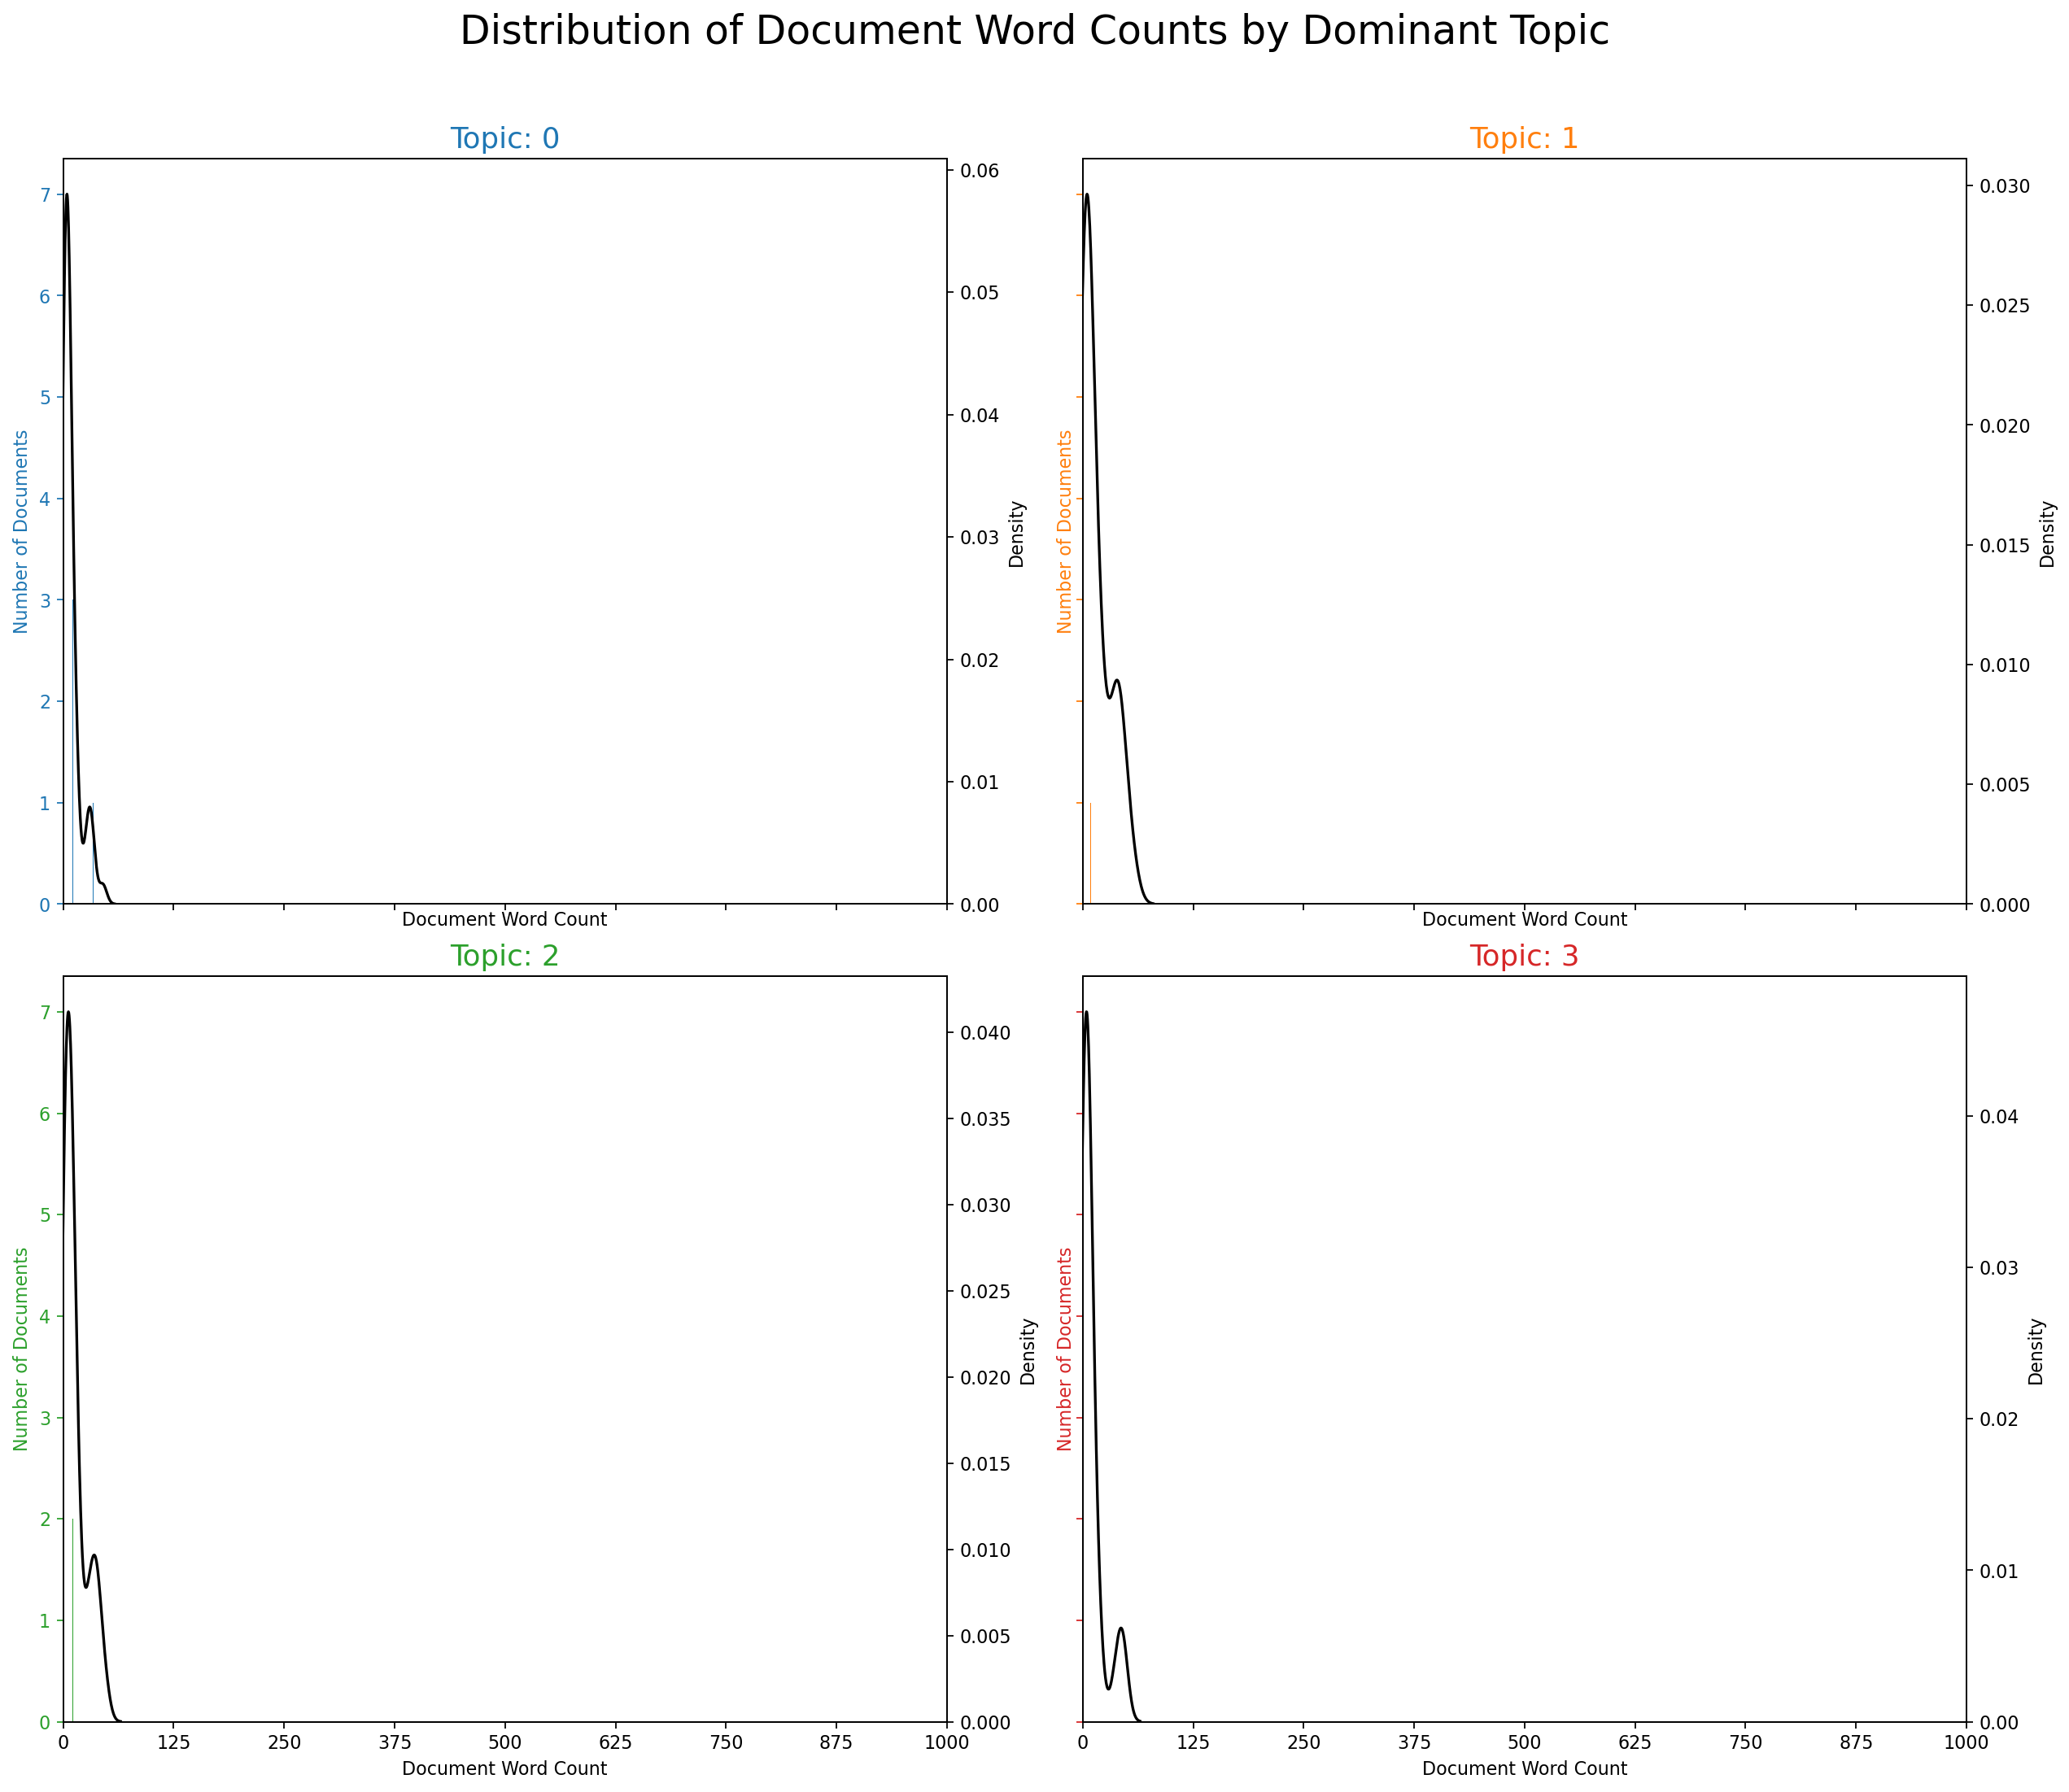

In [214]:
import seaborn as sns
import matplotlib.colors as mcolors
cols = [color for name, color in mcolors.TABLEAU_COLORS.items()]  # more colors: 'mcolors.XKCD_COLORS'

fig, axes = plt.subplots(2,2,figsize=(16,14), dpi=160, sharex=True, sharey=True)

for i, ax in enumerate(axes.flatten()):    
    df_dominant_topic_sub = df_dominant_topic.loc[df_dominant_topic.Dominant_Topic == i, :]
    doc_lens = [len(d) for d in df_dominant_topic_sub.Text]
    ax.hist(doc_lens, bins = 1000, color=cols[i])
    ax.tick_params(axis='y', labelcolor=cols[i], color=cols[i])
    sns.kdeplot(doc_lens, color="black", shade=False, ax=ax.twinx())
    ax.set(xlim=(0, 1000), xlabel='Document Word Count')
    ax.set_ylabel('Number of Documents', color=cols[i])
    ax.set_title('Topic: '+str(i), fontdict=dict(size=16, color=cols[i]))

fig.tight_layout()
fig.subplots_adjust(top=0.90)
plt.xticks(np.linspace(0,1000,9))
fig.suptitle('Distribution of Document Word Counts by Dominant Topic', fontsize=22)
plt.show()

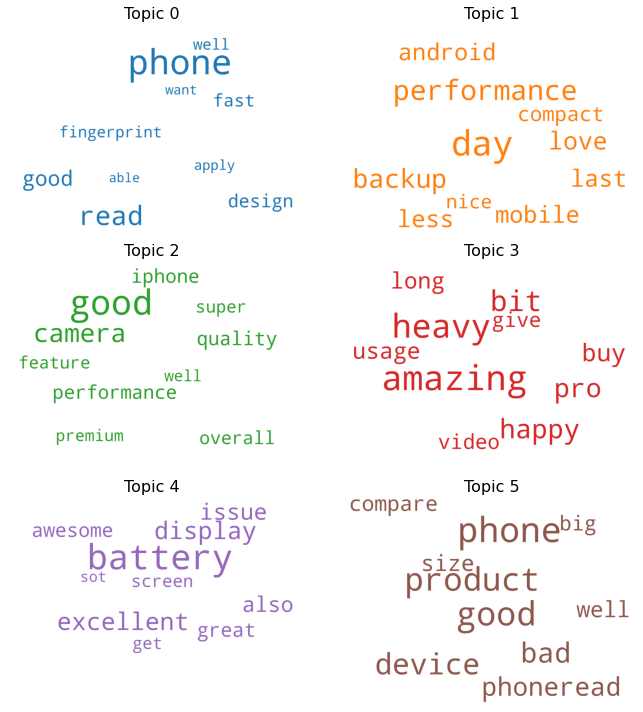

In [218]:
# 1. Wordcloud of Top N words in each topic
from matplotlib import pyplot as plt
from wordcloud import WordCloud, STOPWORDS
import matplotlib.colors as mcolors

cols = [color for name, color in mcolors.TABLEAU_COLORS.items()]  # more colors: 'mcolors.XKCD_COLORS'

cloud = WordCloud(stopwords=stop_words,
                  background_color='white',
                  width=2500,
                  height=1800,
                  max_words=10,
                  colormap='tab10',
                  color_func=lambda *args, **kwargs: cols[i],
                  prefer_horizontal=1.0)

topics = lda_model.show_topics(formatted=False)

fig, axes = plt.subplots(3, 2, figsize=(10,10), sharex=True, sharey=True)

for i, ax in enumerate(axes.flatten()):
    fig.add_subplot(ax)
    topic_words = dict(topics[i][1])
    cloud.generate_from_frequencies(topic_words, max_font_size=300)
    plt.gca().imshow(cloud)
    plt.gca().set_title('Topic ' + str(i), fontdict=dict(size=16))
    plt.gca().axis('off')


plt.subplots_adjust(wspace=0, hspace=0)
plt.axis('off')
plt.margins(x=0, y=0)
plt.tight_layout()
plt.show()

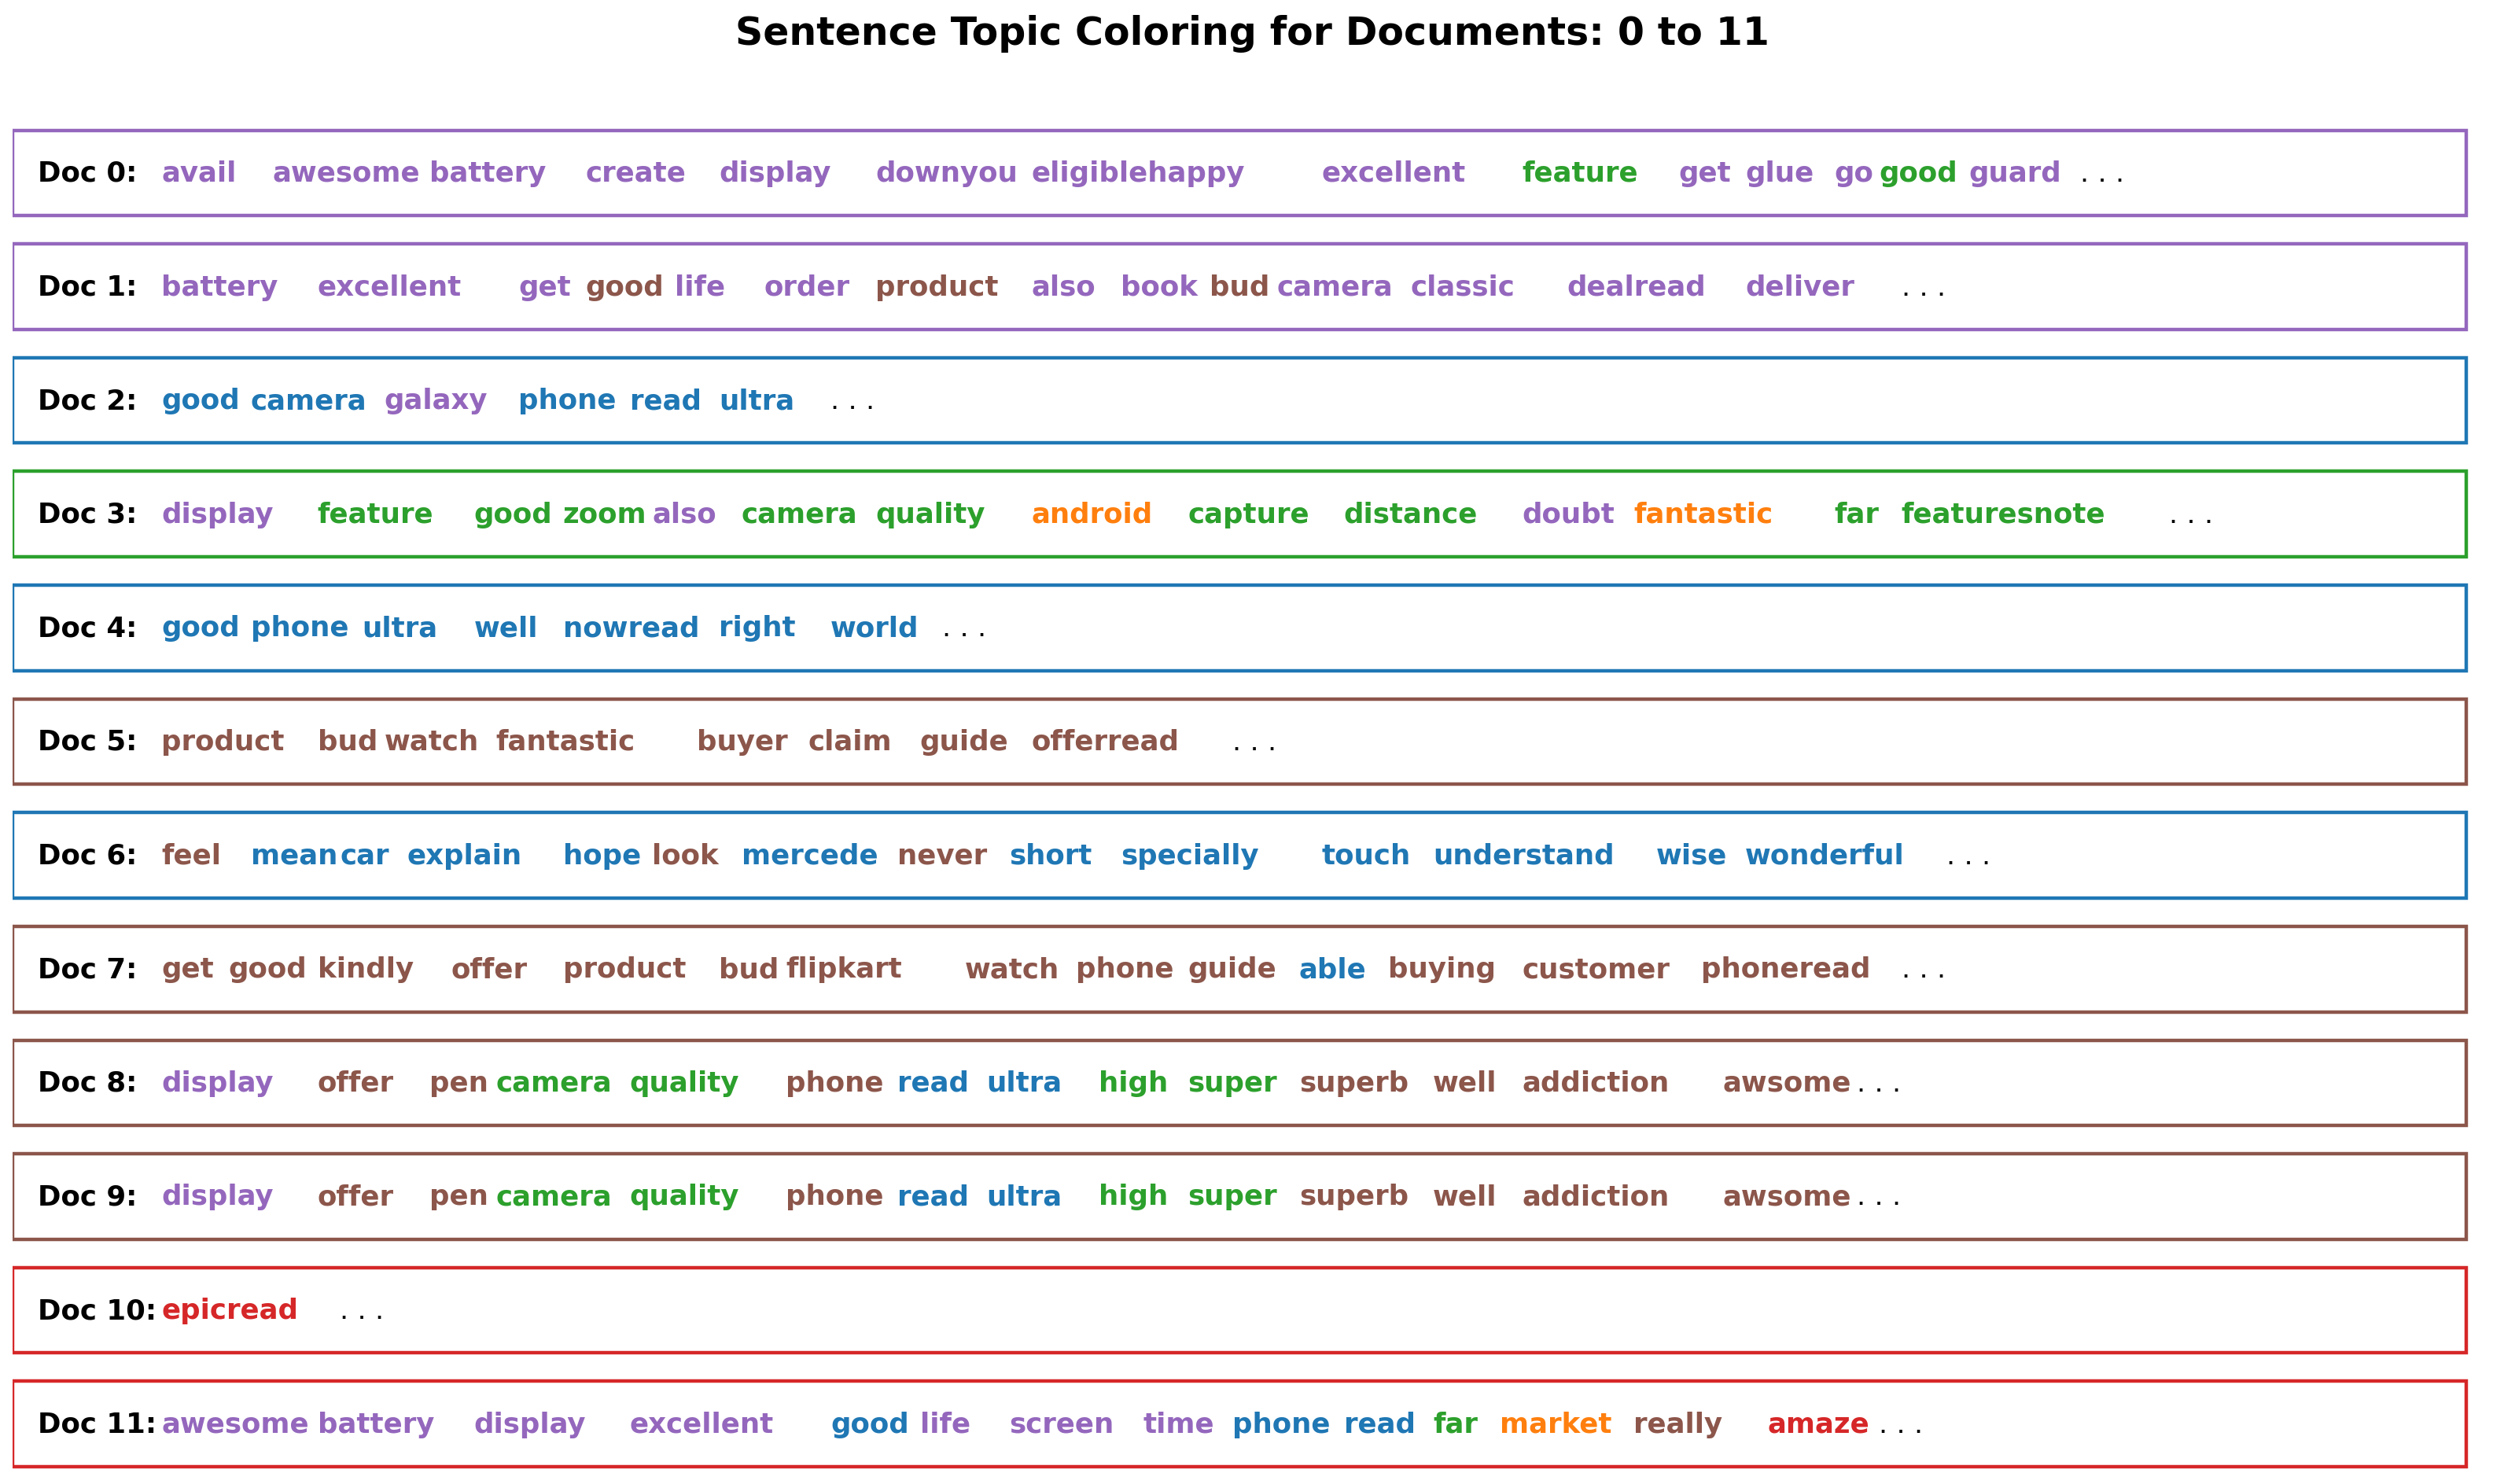

In [220]:
# Sentence Coloring of N Sentences
from matplotlib.patches import Rectangle

def sentences_chart(lda_model=lda_model, corpus=corpus, start = 0, end = 13):
    corp = corpus[start:end]
    mycolors = [color for name, color in mcolors.TABLEAU_COLORS.items()]

    fig, axes = plt.subplots(end-start, 1, figsize=(20, (end-start)*0.95), dpi=160)       
    axes[0].axis('off')
    for i, ax in enumerate(axes):
        if i > 0:
            corp_cur = corp[i-1] 
            topic_percs, wordid_topics, wordid_phivalues = lda_model[corp_cur]
            word_dominanttopic = [(lda_model.id2word[wd], topic[0]) for wd, topic in wordid_topics]    
            ax.text(0.01, 0.5, "Doc " + str(i-1) + ": ", verticalalignment='center',
                    fontsize=16, color='black', transform=ax.transAxes, fontweight=700)

            # Draw Rectange
            topic_percs_sorted = sorted(topic_percs, key=lambda x: (x[1]), reverse=True)
            ax.add_patch(Rectangle((0.0, 0.05), 0.99, 0.90, fill=None, alpha=1, 
                                   color=mycolors[topic_percs_sorted[0][0]], linewidth=2))

            word_pos = 0.06
            for j, (word, topics) in enumerate(word_dominanttopic):
                if j < 14:
                    ax.text(word_pos, 0.5, word,
                            horizontalalignment='left',
                            verticalalignment='center',
                            fontsize=16, color=mycolors[topics],
                            transform=ax.transAxes, fontweight=700)
                    word_pos += .009 * len(word)  # to move the word for the next iter
                    ax.axis('off')
            ax.text(word_pos, 0.5, '. . .',
                    horizontalalignment='left',
                    verticalalignment='center',
                    fontsize=16, color='black',
                    transform=ax.transAxes)       

    plt.subplots_adjust(wspace=0, hspace=0)
    plt.suptitle('Sentence Topic Coloring for Documents: ' + str(start) + ' to ' + str(end-2), fontsize=22, y=0.95, fontweight=700)
    plt.tight_layout()
    plt.show()

sentences_chart()   

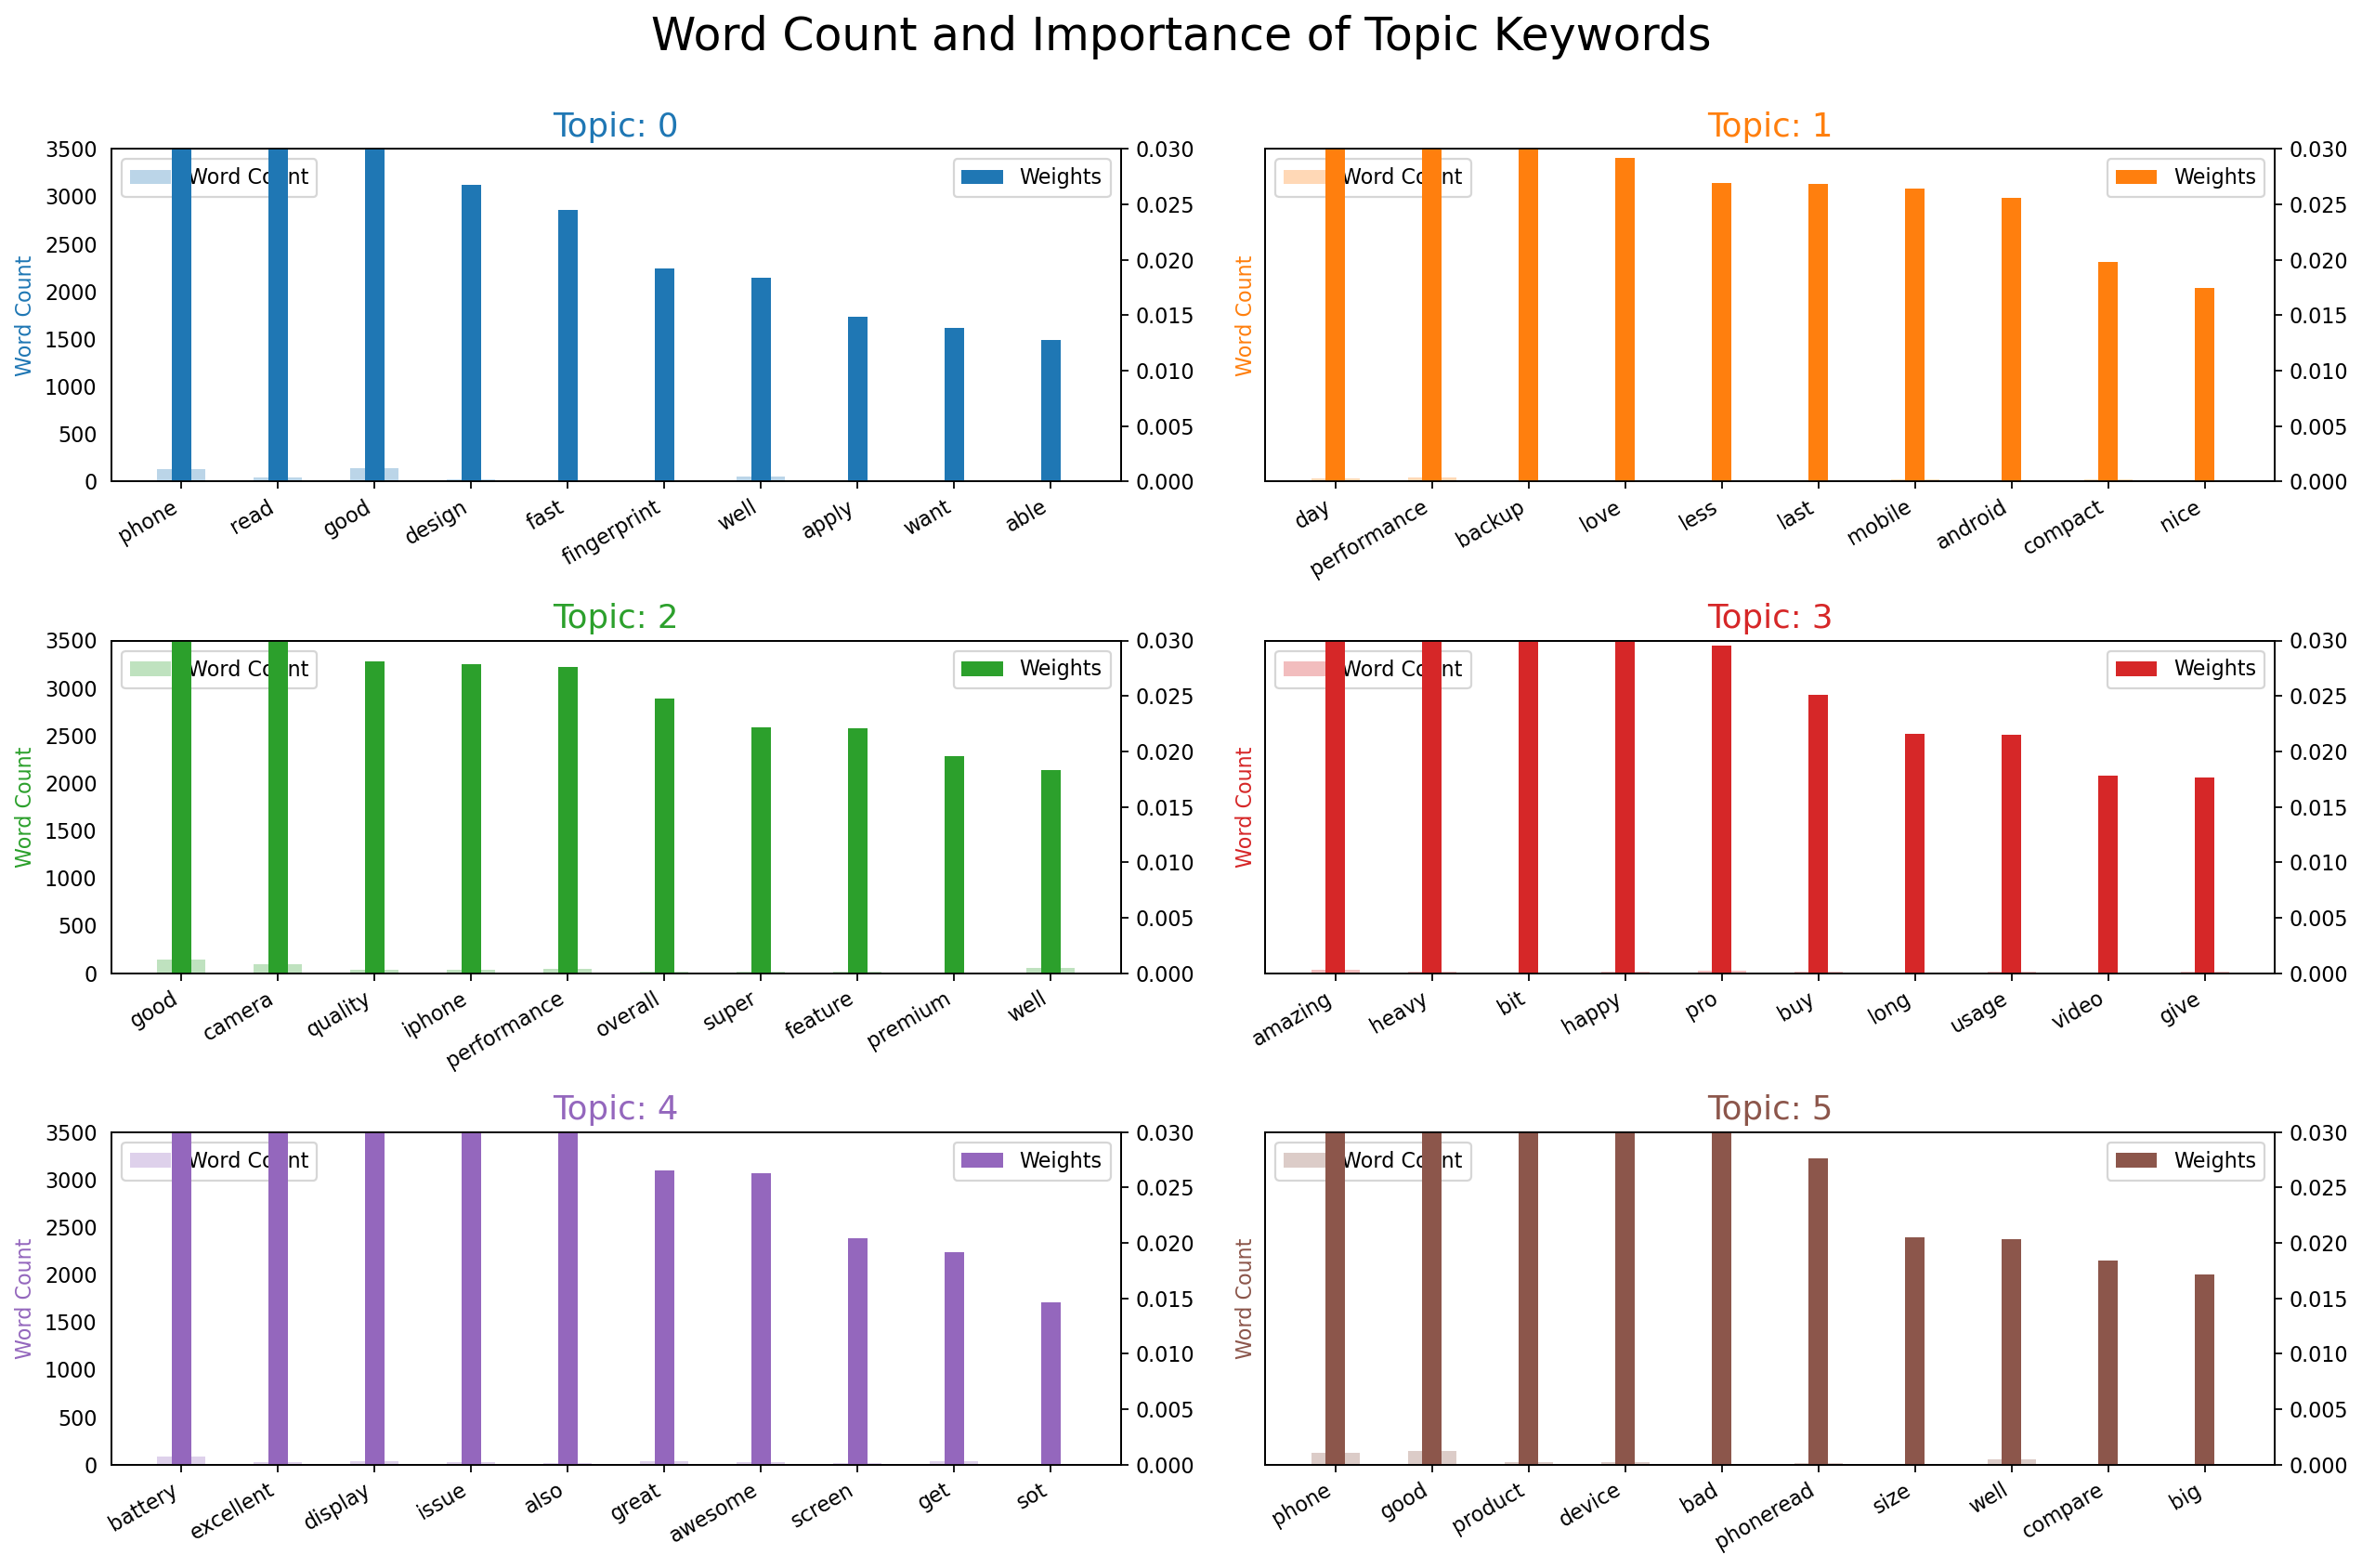

In [221]:
from collections import Counter
topics = lda_model.show_topics(formatted=False)
data_flat = [w for w_list in data_ready for w in w_list]
counter = Counter(data_flat)

out = []
for i, topic in topics:
    for word, weight in topic:
        out.append([word, i , weight, counter[word]])

df = pd.DataFrame(out, columns=['word', 'topic_id', 'importance', 'word_count'])        

# Plot Word Count and Weights of Topic Keywords
fig, axes = plt.subplots(3, 2, figsize=(16,10), sharey=True, dpi=160)
cols = [color for name, color in mcolors.TABLEAU_COLORS.items()]
for i, ax in enumerate(axes.flatten()):
    ax.bar(x='word', height="word_count", data=df.loc[df.topic_id==i, :], color=cols[i], width=0.5, alpha=0.3, label='Word Count')
    ax_twin = ax.twinx()
    ax_twin.bar(x='word', height="importance", data=df.loc[df.topic_id==i, :], color=cols[i], width=0.2, label='Weights')
    ax.set_ylabel('Word Count', color=cols[i])
    ax_twin.set_ylim(0, 0.030); ax.set_ylim(0, 3500)
    ax.set_title('Topic: ' + str(i), color=cols[i], fontsize=16)
    ax.tick_params(axis='y', left=False)
    ax.set_xticklabels(df.loc[df.topic_id==i, 'word'], rotation=30, horizontalalignment= 'right')
    ax.legend(loc='upper left'); ax_twin.legend(loc='upper right')

fig.tight_layout(w_pad=2)    
fig.suptitle('Word Count and Importance of Topic Keywords', fontsize=22, y=1.05)    
plt.show()

In [223]:
# Get topic weights and dominant topics ------------
from sklearn.manifold import TSNE
from bokeh.plotting import figure, output_file, show
from bokeh.models import Label
from bokeh.io import output_notebook

# Get topic weights
topic_weights = []
for i, row_list in enumerate(lda_model[corpus]):
    topic_weights.append([w for i, w in row_list[0]])

# Array of topic weights    
arr = pd.DataFrame(topic_weights).fillna(0).values

# Keep the well separated points (optional)
arr = arr[np.amax(arr, axis=1) > 0.35]

# Dominant topic number in each doc
topic_num = np.argmax(arr, axis=1)

# tSNE Dimension Reduction
tsne_model = TSNE(n_components=2, verbose=1, random_state=0, angle=.99, init='pca')
tsne_lda = tsne_model.fit_transform(arr)

# Plot the Topic Clusters using Bokeh
output_notebook()
n_topics = 6
mycolors = np.array([color for name, color in mcolors.TABLEAU_COLORS.items()])
plot = figure(title="t-SNE Clustering of {} LDA Topics".format(n_topics), 
              plot_width=900, plot_height=700)
plot.scatter(x=tsne_lda[:,0], y=tsne_lda[:,1], color=mycolors[topic_num])
show(plot)

[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 254 samples in 0.000s...
[t-SNE] Computed neighbors for 254 samples in 0.017s...
[t-SNE] Computed conditional probabilities for sample 254 / 254
[t-SNE] Mean sigma: 0.206019
[t-SNE] KL divergence after 250 iterations with early exaggeration: 60.494644
[t-SNE] KL divergence after 900 iterations: 0.353968


Loading BokehJS ...

In [226]:
# import pyLDAvis.gensim
# pyLDAvis.enable_notebook()
# vis = pyLDAvis.gensim.prepare(lda_model, corpus, dictionary=lda_model.id2word)
# vis

Emotions detected in the text:
Review: I am so excited to see my friends tomorrow. It's going to be a great day!
Emotion: Anxiety

Review: I feel really sad about the loss of my pet.
Emotion: Joy

Review: I'm feeling anxious about the upcoming exam.
Emotion: Sadness

Review: This news surprised me a lot.
Emotion: Joy

Review: I can't stand the smell of that food. It disgusts me.
Emotion: Sadness



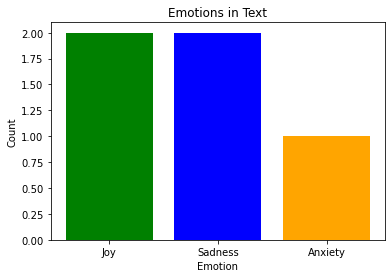

In [229]:
import pandas as pd
import numpy as np
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation

# Sample list of reviews
reviews = [
    "I am so excited to see my friends tomorrow. It's going to be a great day!",
    "I feel really sad about the loss of my pet.",
    "I'm feeling anxious about the upcoming exam.",
    "This news surprised me a lot.",
    "I can't stand the smell of that food. It disgusts me.",
]

# Function to preprocess the text data
def preprocess_text(text):
    lemmatizer = WordNetLemmatizer()
    stop_words = set(stopwords.words('english'))
    text = re.sub(r'\W', ' ', text)  # Remove non-word characters
    text = re.sub(r'\s+', ' ', text)  # Remove extra spaces
    text = text.lower()  # Convert to lowercase
    tokens = nltk.word_tokenize(text)
    tokens = [token for token in tokens if token not in stop_words]  # Remove stop words
#     tokens = [lemmatizer.lemmatize(token) for token in tokens]  # Lemmatize words
    return ' '.join(tokens)

# Preprocess the reviews
processed_reviews = [preprocess_text(review) for review in reviews]

# Create a document-term matrix using CountVectorizer
vectorizer = CountVectorizer(max_features=1000)
X = vectorizer.fit_transform(processed_reviews)

# Apply Latent Dirichlet Allocation (LDA) for emotion detection
num_topics = 3  # Number of emotions/topics to identify
lda_model = LatentDirichletAllocation(n_components=num_topics, random_state=42)
lda_model.fit(X)

# Get the most probable emotions for each review
emotions = []
for i, review in enumerate(reviews):
    topic_probs = lda_model.transform(X[i])
    most_probable_topic = np.argmax(topic_probs)
    emotions.append(most_probable_topic)

# Define emotion labels for the identified topics
emotion_labels = {
    0: "Joy",
    1: "Sadness",
    2: "Anxiety",
}

# Print the detected emotions
print("Emotions detected in the text:")
for i, review in enumerate(reviews):
    print(f"Review: {review}")
    print(f"Emotion: {emotion_labels[emotions[i]]}")
    print()

# Create a bar graph to visualize the emotions
import matplotlib.pyplot as plt

emotion_counts = np.bincount(emotions)
plt.bar(emotion_labels.values(), emotion_counts, color=['green', 'blue', 'orange'])
plt.xlabel("Emotion")
plt.ylabel("Count")
plt.title("Emotions in Text")
plt.show()
